In [1]:
%matplotlib inline
import pandas as pd
import xarray as xr
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi
from numpy import sin,cos,pi
from windrose import WindroseAxes

In [2]:
df_sheet_index = pd.read_excel("E:\JU Class\PROJECT\MAIN IMP FILES\AIR QUALITY DATA (2019-2022).xlsx", sheet_name="SEP'22")
print (df_sheet_index)

           From Date           To Date  PM2.5   PM10     NO    NO2    NOx  \
0   01-09-2022 00:00  02-09-2022 00:00   8.28  23.21   9.31  17.61  26.85   
1   02-09-2022 00:00  03-09-2022 00:00   9.91  25.19   6.52  14.73  21.25   
2   03-09-2022 00:00  04-09-2022 00:00  11.19  32.25   6.63  17.69  24.33   
3   04-09-2022 00:00  05-09-2022 00:00  29.65  55.64   6.56  19.66  26.22   
4   05-09-2022 00:00  06-09-2022 00:00  26.06  50.20   5.57  17.84  23.42   
5   06-09-2022 00:00  07-09-2022 00:00  28.36  63.82  18.82  38.53  57.35   
6   07-09-2022 00:00  08-09-2022 00:00  26.22  55.51  20.25  27.14  47.39   
7   08-09-2022 00:00  09-09-2022 00:00  10.49  41.10  33.39  28.47  61.86   
8   09-09-2022 00:00  10-09-2022 00:00  25.54  51.77  27.25  34.27  61.52   
9   10-09-2022 00:00  11-09-2022 00:00  12.82  33.78  10.88  18.25  29.17   
10  11-09-2022 00:00  12-09-2022 00:00  11.18  22.32  12.96  15.07  28.03   
11  12-09-2022 00:00  13-09-2022 00:00  11.66  18.80  13.77  20.30  34.07   

In [3]:
df_sheet_index.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,SO2,Ozone,RH,BP,WD,WS,AQI,Unnamed: 14
0,01-09-2022 00:00,02-09-2022 00:00,8.28,23.21,9.31,17.61,26.85,5.29,14.13,97.82,993.63,139.27,0.75,35.0,Good
1,02-09-2022 00:00,03-09-2022 00:00,9.91,25.19,6.52,14.73,21.25,6.22,19.21,94.28,985.43,154.22,0.64,23.0,Good
2,03-09-2022 00:00,04-09-2022 00:00,11.19,32.25,6.63,17.69,24.33,4.93,19.57,99.17,980.13,164.93,0.89,29.0,Good
3,04-09-2022 00:00,05-09-2022 00:00,29.65,55.64,6.56,19.66,26.22,5.72,31.18,97.55,982.58,165.02,0.67,NaN,False
4,05-09-2022 00:00,06-09-2022 00:00,26.06,50.20,5.57,17.84,23.42,4.93,30.25,97.34,985.15,136.61,0.76,53.0,Satisfactory


In [4]:
df_sheet_index = df_sheet_index.drop(['AQI'], axis=1)

In [5]:
df_sheet_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   From Date    30 non-null     object 
 1   To Date      30 non-null     object 
 2   PM2.5        30 non-null     float64
 3   PM10         30 non-null     float64
 4   NO           30 non-null     float64
 5   NO2          30 non-null     float64
 6   NOx          30 non-null     float64
 7   SO2          30 non-null     float64
 8   Ozone        30 non-null     float64
 9   RH           30 non-null     float64
 10  BP           30 non-null     float64
 11  WD           30 non-null     float64
 12  WS           30 non-null     float64
 13  Unnamed: 14  30 non-null     object 
dtypes: float64(11), object(3)
memory usage: 3.4+ KB


In [6]:
df_sheet_index = df_sheet_index.drop(['From Date','To Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'SO2', 'Ozone', 'RH', 'BP'], axis=1)

In [7]:
df_sheet_index.head()

,WD,WS,Unnamed: 14
0,139.27,0.75,Good
1,154.22,0.64,Good
2,164.93,0.89,Good
3,165.02,0.67,False
4,136.61,0.76,Satisfactory


<AxesSubplot:xlabel='ws_x', ylabel='ws_y'>

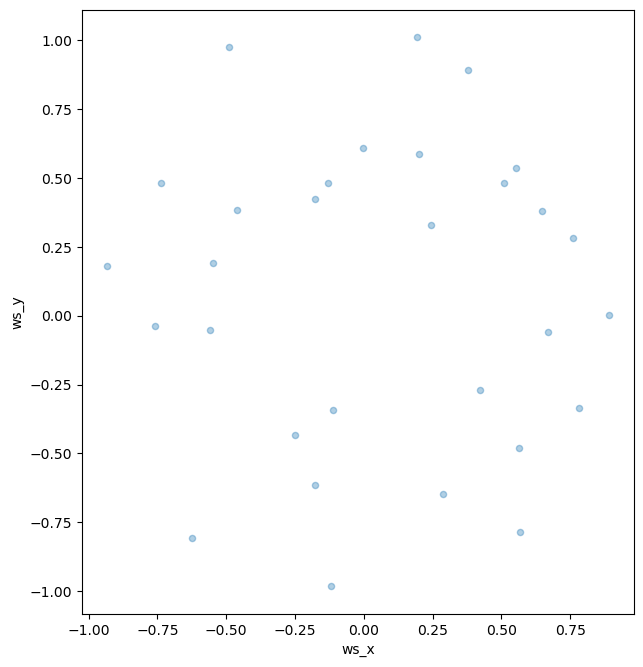

In [8]:
df_sheet_index['ws_x'] = df_sheet_index['WS'] * np.sin(df_sheet_index['WD'])
df_sheet_index['ws_y'] = df_sheet_index['WS'] * np.cos(df_sheet_index['WD'])
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
df_sheet_index.plot(kind='scatter', x='ws_x', y='ws_y', alpha=0.35, ax=ax)

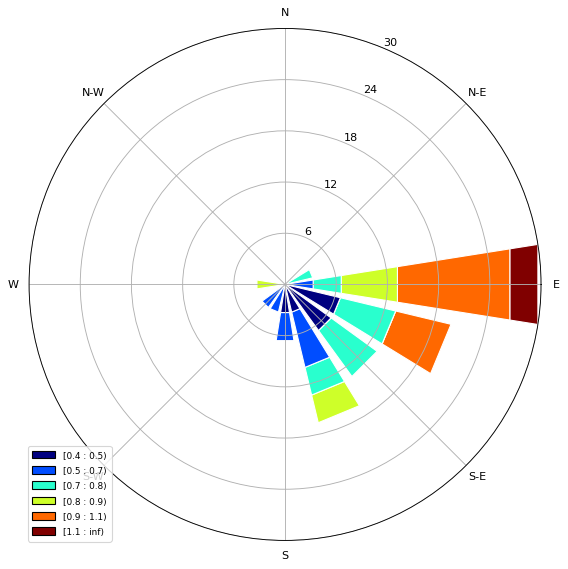

In [9]:
ax = WindroseAxes.from_ax()
ax.bar(df_sheet_index.WD, df_sheet_index.WS, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

<AxesSubplot:>

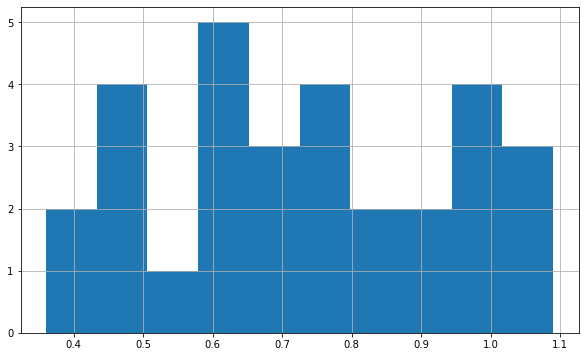

In [10]:
df_sheet_index['WS'].hist(figsize=(10,6))

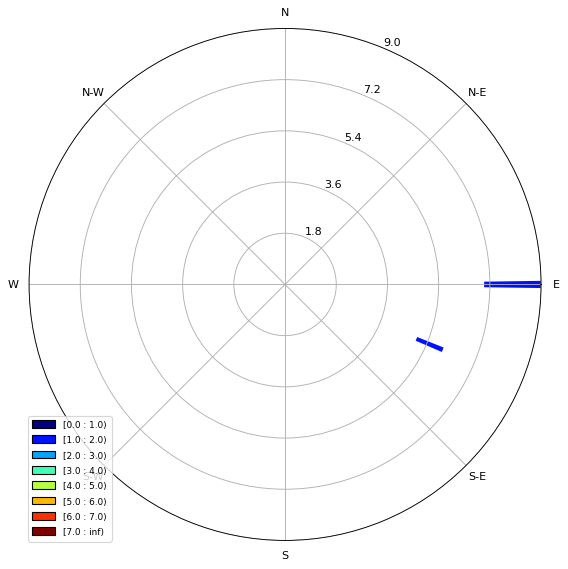

In [11]:
ax = WindroseAxes.from_ax()
ax.box(df_sheet_index.WD, df_sheet_index.WS, bins=np.arange(0,8,1))
ax.set_legend()

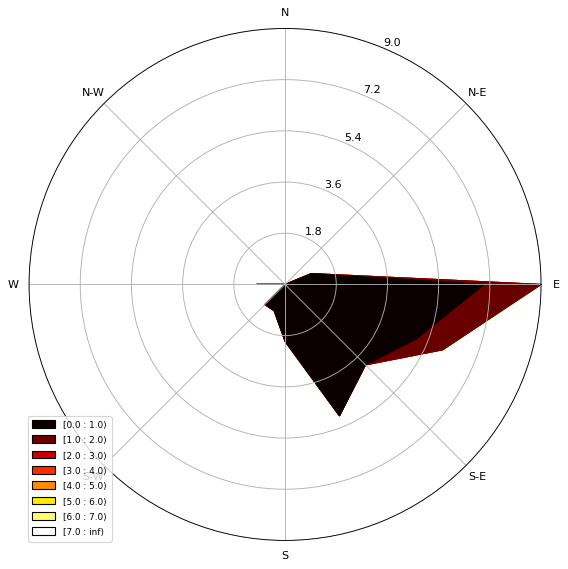

In [12]:
ax = WindroseAxes.from_ax()
ax.contourf(df_sheet_index.WD, df_sheet_index.WS, bins=np.arange(0,8,1), cmap=cm.hot)
ax.set_legend()